#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from sklearn.datasets import load_boston

In [46]:
boston = load_boston()
data = boston.data

In [47]:
feature_names = boston.feature_names

In [48]:
target = boston.target

In [49]:
X = pd.DataFrame(data, columns = feature_names)

In [50]:
y = pd.DataFrame(target, columns = ['price'])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [57]:
X_test_scaled = scaler.transform(X_test)

In [58]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [61]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

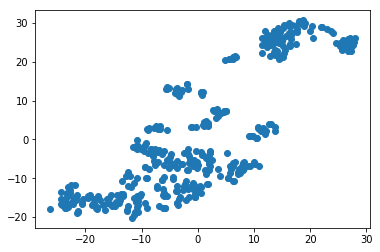

In [62]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [84]:
labels_train = kmeans.fit_predict(X_train_scaled)

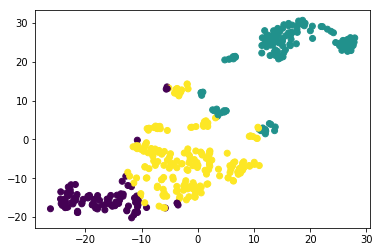

In [85]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [86]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [87]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [88]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367

In [89]:
y_train.loc[labels_train == 0 , 'price'].mean()

27.788372093023252

In [90]:
y_train.loc[labels_train == 1, 'price'].mean()

16.165354330708666

In [91]:
y_train.loc[labels_train == 2, 'price'].mean()

24.958115183246072

#### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [101]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [102]:
labels_test = kmeans.predict(X_test_scaled)

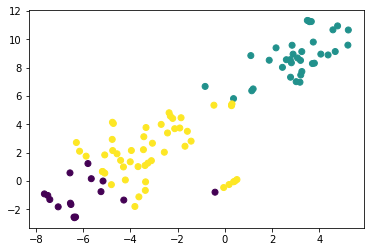

In [103]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)

In [104]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.062060000000000004

In [105]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

10.165531142857143

In [106]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.26607882352941176

In [107]:
y_test.loc[labels_test == 0, 'price'].mean()

31.35

In [108]:
y_test.loc[labels_test == 1, 'price'].mean()

16.437142857142856

In [109]:
y_test.loc[labels_test == 2, 'price'].mean()

21.860784313725492